In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [9]:
# Import data

crabs = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ZybookDataScience/Data/crab-groups.csv')
# Store relevant columns as variables
X = crabs[['latitude']].values.reshape(-1, 1)
y = crabs[['mean_mm']].values.reshape(-1, 1)

In [10]:
# Fit a least squares regression model
linModel = LinearRegression();
linModel.fit(X, y);

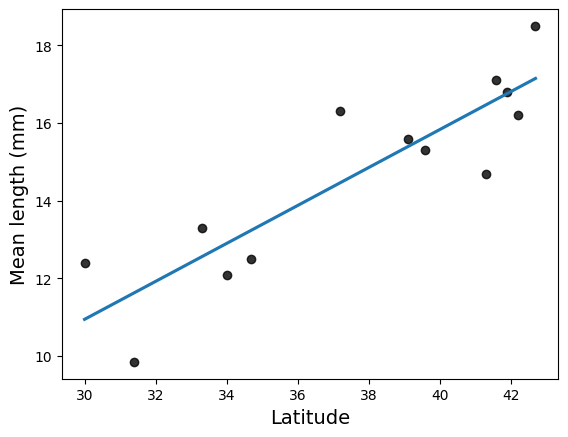

In [11]:
# regplot() creates a scatter plot with the regression line overlaid
p = sns.regplot(data=crabs, x='latitude', y='mean_mm', ci=False, scatter_kws={'color':'black'})
p.set_xlabel('Latitude', fontsize=14);
p.set_ylabel('Mean length (mm)', fontsize=14);

In [7]:
# Calculate predicted values and residuals
yPredicted = linModel.predict(X)
yResid = yPredicted - y

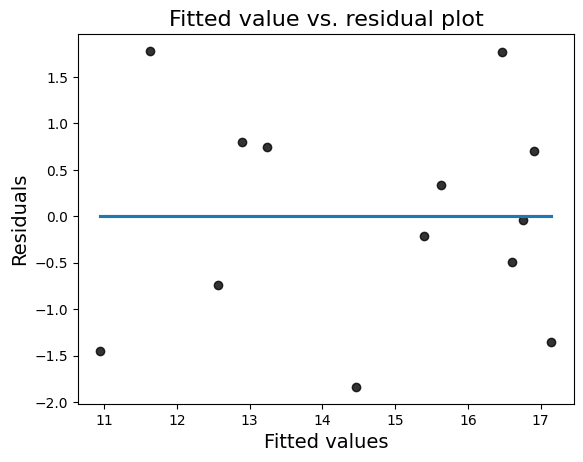

In [7]:
# Scatter plot with predicted values vs. residuals
# Points should be scattered around a horizontal line at y=0 with no obvious pattern
p = sns.regplot(x=yPredicted, y=yResid, ci=False, scatter_kws={'color':'black'})
p.set_xlabel('Fitted values', fontsize=14);
p.set_ylabel('Residuals', fontsize=14);
p.set_title('Fitted value vs. residual plot', fontsize=16);

[-1.8374667649969876, -1.4535573582781822, -1.3515642284627418, -0.7420158363576395, -0.4887447357695933, -0.20960952510333897, -0.04224096104954711, 0.3345634327634084, 0.7042628136705069, 0.7416684456692639, 0.799826304655813, 1.7647514895103562, 1.7801269237487158]


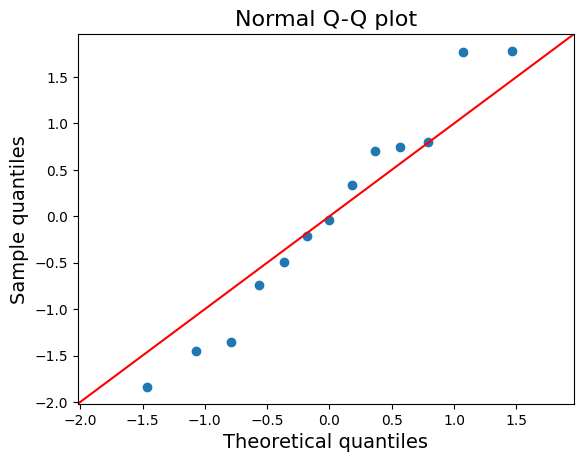

In [8]:
# Residuals must be stored as a flattened array
resid = np.ravel(yResid)
print (sorted(resid))
#Using the formula
#Percentiles=[0.0385,0.1154,0.1923,0.2692,0.3462,0.4231,0.5000,0.5769,0.6538,0.7308,0.8077,0.8846,0.9615]

# Use qqplot() from statsmodels to make a QQ plot
p = sm.qqplot(resid, line='45')
plt.title('Normal Q-Q plot', fontsize=16);
plt.xlabel('Theoretical quantiles', fontsize=14);
plt.ylabel('Sample quantiles', fontsize=14);